<a href="https://colab.research.google.com/github/KimSeonHo-719/CV/blob/main/20251_ComputerVision_Assignment_4_%E1%84%89%E1%85%B5%E1%86%AF%E1%84%89%E1%85%B3%E1%86%B8%E1%84%8F%E1%85%A9%E1%84%83%E1%85%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tensor 실습

밑에 Q1,Q2,Q3,Q4,Q5번 코드와 해설까지 모두 작성하였습니다.

Tensor 연산 실습

Tensor 연산 실습 2

학습 예시

다변수 학습

다변수 함수 visualize

다변수 함수 학습 과정 visualize - low learning rate

다변수 함수 학습 과정 visualize - high learning rate

simple linear function 학습

simple classification 학습

# Q1.
(1) nn.Conv2D
- 역할: feature map에 다수의 2D 필터를 슬라이딩하여 에지, 코너 등 추출
- 입력: (N, C_in, H_in, W_in)
- 출력: (N, C_out, H_out, W_out)

(2) nn.ReLU
- 역할: 비선형 활성화 함수, 음수 값을 0으로 클리핑하는 모양 -> 비선형성 부여
- 입력, 출력: X

(3) nn.MaxPool2D
- 역할: 다운 샘플
- 입력: (N, C_in, H_in, W_in)
- 출력: (N, C_out, H_out, W_out)

(4) nn.AdaptiveAvgPool2d
- 역할: 입력 크기에 상관없이 지정한 출력 크기로 평균 풀링
- 입력: (N, C_in, H_in, W_in)
- 출력: (N, C_out, H_out, W_out)

(5) nn.Flatten
- 역할: 다차원 텐서를 1차원 벡터로 펼쳐서 Fully-Connected Layer(Linear) 입력에 맞춤
- 입력: (N, C, H, W)
- 출력: (N, C*H*W)

(6) nn.Linear
- 역할: 입력 벡터에 weight, bias 곱해서 선형 변환 수행 -> Fully Connected
- 입력: (N, in_features)
- 출력: (N, out_features)

(7) nn.CrossEntropyLoss
- 역할: Softmax + NLL 손실 함수
- 입력: 모델 출력(logits, N, num_classes), 정답 레이블(정수 텐서, N)
- 출력: 스칼라 손실값

Q2.
기존 CNN 모델
- 구조: Conv32->MaxPool->Conv64->MaxPool->GAP->Linear(64->10)
- batch=16, learning rate=0.001, SGD(momentum=0.9), epochs=10
- 결과 => Epoch 10: Train Loss = 1.4505, Test Acc = 0.4783

---



새로운 CNN 모델
- 구조: (Conv->Pool) 3번 반복, 동시에 채널 수 확장
- batch=64로 확장, BatchNorm->배치정규화, Dropout 추가(오버피팅 방지)

---


향상된 결과 =>
- 블록 수와 채널을 증가하여 더 복잡한 특징을 잡아내서 학습, 일반화 능력이 향상됨.
- BatchNorm 정규화 덕분에 학습 안정성이 좋아지는 효과를 얻어냄.
- Dropout을 통해 오버피팅 억제함.
- 배치를 64로 확장하고 배치 정규화와 조합하여 수렴 속도가 크게 빨라짐.
- Epoch 10: Train Loss = 0.9135, Test Acc = 0.6973 -> Loss가 줄고, 정확도가 향상된 것을 볼 수 있다.

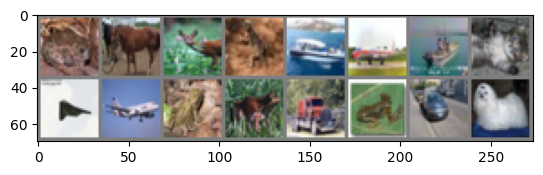

frog  horse deer  frog  ship  plane ship  cat   plane plane frog  frog  truck frog  car   dog  


100%|██████████| 3125/3125 [00:23<00:00, 131.40it/s]


Epoch 1: Train Loss = 1.7429, Test Acc = 0.4679


100%|██████████| 3125/3125 [00:23<00:00, 135.35it/s]


Epoch 2: Train Loss = 1.4220, Test Acc = 0.5623


100%|██████████| 3125/3125 [00:25<00:00, 121.92it/s]


Epoch 3: Train Loss = 1.2765, Test Acc = 0.5833


100%|██████████| 3125/3125 [00:24<00:00, 125.31it/s]


Epoch 4: Train Loss = 1.1894, Test Acc = 0.6020


100%|██████████| 3125/3125 [00:26<00:00, 117.12it/s]


Epoch 5: Train Loss = 1.1243, Test Acc = 0.6168


100%|██████████| 3125/3125 [00:25<00:00, 122.54it/s]


Epoch 6: Train Loss = 1.0659, Test Acc = 0.6318


100%|██████████| 3125/3125 [00:24<00:00, 129.09it/s]


Epoch 7: Train Loss = 1.0237, Test Acc = 0.6607


100%|██████████| 3125/3125 [00:23<00:00, 135.43it/s]


Epoch 8: Train Loss = 0.9861, Test Acc = 0.6512


100%|██████████| 3125/3125 [00:25<00:00, 122.61it/s]


Epoch 9: Train Loss = 0.9454, Test Acc = 0.6938


100%|██████████| 3125/3125 [00:24<00:00, 127.64it/s]


Epoch 10: Train Loss = 0.9135, Test Acc = 0.6973


In [ ]:
# CIFAR-10 CNN 실습 템플릿 (Augmentation 없음)
# Q2.
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from tqdm import tqdm

# 1. 데이터셋 준비
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # RGB 채널 정규화
])

train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

train_batch_size = 16
test_batch_size = 16

train_loader = DataLoader(train_set, batch_size=train_batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=test_batch_size, shuffle=False)

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 학습용 이미지를 무작위로 가져오기
dataiter = iter(train_loader)
images, labels = next(dataiter)

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(train_batch_size)))

# 2. CNN 모델 정의
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.features = nn.Sequential(
            # Conv->Pool (3->64)
            nn.Conv2d(3, 64, 3, padding=1),
            nn.BatchNorm2d(64), nn.ReLU(inplace=True),
            nn.MaxPool2d(2),

            # Conv->Pool (64->128)
            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128), nn.ReLU(inplace=True),
            nn.MaxPool2d(2),

            # Conv->Pool (128->256)
            nn.Conv2d(128, 256, 3, padding=1),
            nn.BatchNorm2d(256), nn.ReLU(inplace=True),
            nn.AdaptiveAvgPool2d((1, 1))  # Global Average Pooling → [B, 64, 1, 1]
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),                  # → [B, 64]
            nn.Linear(256,128),
            nn.ReLU(inplace=True),
            # Dropout(0.5) 추가 -> 오버피팅 방지
            nn.Dropout(0.5),
            nn.Linear(128,10)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# 3. 학습 함수
def train(model, loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    for inputs, targets in tqdm(loader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

# 4. 평가 함수
def evaluate(model, loader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == targets).sum().item()
            total += targets.size(0)
    return correct / total

# 5. 학습
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

num_epochs = 10
for epoch in range(num_epochs):
    train_loss = train(model, train_loader, criterion, optimizer, device)
    test_acc = evaluate(model, test_loader, device)
    print(f"Epoch {epoch+1}: Train Loss = {train_loss:.4f}, Test Acc = {test_acc:.4f}")


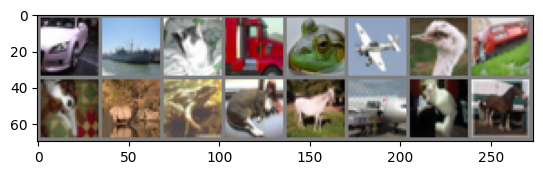

car   ship  cat   truck frog  plane bird  car   dog   deer  frog  cat   horse plane cat   horse


100%|██████████| 3125/3125 [00:25<00:00, 120.68it/s]


Epoch 1: Train Loss = 1.7056, Test Acc = 0.4805


100%|██████████| 3125/3125 [00:25<00:00, 123.51it/s]


Epoch 2: Train Loss = 1.3908, Test Acc = 0.5554


100%|██████████| 3125/3125 [00:27<00:00, 115.68it/s]


Epoch 3: Train Loss = 1.2578, Test Acc = 0.5680


100%|██████████| 3125/3125 [00:27<00:00, 112.37it/s]


Epoch 4: Train Loss = 1.1698, Test Acc = 0.5301


100%|██████████| 3125/3125 [00:24<00:00, 127.77it/s]


Epoch 5: Train Loss = 1.1021, Test Acc = 0.6175


100%|██████████| 3125/3125 [00:23<00:00, 134.07it/s]


Epoch 6: Train Loss = 1.0499, Test Acc = 0.6581


100%|██████████| 3125/3125 [00:22<00:00, 136.79it/s]


Epoch 7: Train Loss = 1.0057, Test Acc = 0.6706


100%|██████████| 3125/3125 [00:22<00:00, 136.57it/s]


Epoch 8: Train Loss = 0.9584, Test Acc = 0.7001


100%|██████████| 3125/3125 [00:24<00:00, 126.01it/s]


Epoch 9: Train Loss = 0.9166, Test Acc = 0.6367


100%|██████████| 3125/3125 [00:24<00:00, 125.13it/s]


Epoch 10: Train Loss = 0.8867, Test Acc = 0.7276


100%|██████████| 3125/3125 [00:26<00:00, 116.97it/s]


Epoch 11: Train Loss = 0.8568, Test Acc = 0.6837


100%|██████████| 3125/3125 [00:23<00:00, 134.72it/s]


Epoch 12: Train Loss = 0.8223, Test Acc = 0.7084


100%|██████████| 3125/3125 [00:23<00:00, 133.95it/s]


Epoch 13: Train Loss = 0.7932, Test Acc = 0.7059


100%|██████████| 3125/3125 [00:23<00:00, 134.45it/s]


Epoch 14: Train Loss = 0.7718, Test Acc = 0.7430


100%|██████████| 3125/3125 [00:23<00:00, 134.89it/s]


Epoch 15: Train Loss = 0.7438, Test Acc = 0.7397


100%|██████████| 3125/3125 [00:23<00:00, 134.60it/s]


Epoch 16: Train Loss = 0.7204, Test Acc = 0.7450


100%|██████████| 3125/3125 [00:22<00:00, 136.55it/s]


Epoch 17: Train Loss = 0.6984, Test Acc = 0.7518


100%|██████████| 3125/3125 [00:23<00:00, 134.09it/s]


Epoch 18: Train Loss = 0.6760, Test Acc = 0.7524


100%|██████████| 3125/3125 [00:23<00:00, 135.30it/s]


Epoch 19: Train Loss = 0.6584, Test Acc = 0.7726


100%|██████████| 3125/3125 [00:23<00:00, 134.79it/s]


Epoch 20: Train Loss = 0.6374, Test Acc = 0.7571


100%|██████████| 3125/3125 [00:23<00:00, 134.58it/s]


Epoch 21: Train Loss = 0.6170, Test Acc = 0.7835


100%|██████████| 3125/3125 [00:23<00:00, 134.99it/s]


Epoch 22: Train Loss = 0.5963, Test Acc = 0.7664


100%|██████████| 3125/3125 [00:23<00:00, 135.19it/s]


Epoch 23: Train Loss = 0.5821, Test Acc = 0.7716


100%|██████████| 3125/3125 [00:23<00:00, 133.09it/s]


Epoch 24: Train Loss = 0.5622, Test Acc = 0.7782


100%|██████████| 3125/3125 [00:23<00:00, 134.69it/s]


Epoch 25: Train Loss = 0.5511, Test Acc = 0.7961


100%|██████████| 3125/3125 [00:22<00:00, 135.91it/s]


Epoch 26: Train Loss = 0.5308, Test Acc = 0.7738


100%|██████████| 3125/3125 [00:23<00:00, 135.78it/s]


Epoch 27: Train Loss = 0.5143, Test Acc = 0.8058


100%|██████████| 3125/3125 [00:23<00:00, 135.64it/s]


Epoch 28: Train Loss = 0.4968, Test Acc = 0.7985


100%|██████████| 3125/3125 [00:23<00:00, 135.15it/s]


Epoch 29: Train Loss = 0.4800, Test Acc = 0.8071


100%|██████████| 3125/3125 [00:22<00:00, 136.39it/s]


Epoch 30: Train Loss = 0.4675, Test Acc = 0.8201


100%|██████████| 3125/3125 [00:23<00:00, 134.77it/s]


Epoch 31: Train Loss = 0.4597, Test Acc = 0.8150


100%|██████████| 3125/3125 [00:23<00:00, 135.14it/s]


Epoch 32: Train Loss = 0.4383, Test Acc = 0.7774


100%|██████████| 3125/3125 [00:23<00:00, 134.94it/s]


Epoch 33: Train Loss = 0.4268, Test Acc = 0.7878


100%|██████████| 3125/3125 [00:23<00:00, 135.05it/s]


Epoch 34: Train Loss = 0.4117, Test Acc = 0.8093


100%|██████████| 3125/3125 [00:23<00:00, 135.00it/s]


Epoch 35: Train Loss = 0.3978, Test Acc = 0.7893


100%|██████████| 3125/3125 [00:23<00:00, 135.57it/s]


Epoch 36: Train Loss = 0.3912, Test Acc = 0.7863


100%|██████████| 3125/3125 [00:22<00:00, 137.53it/s]


Epoch 37: Train Loss = 0.3747, Test Acc = 0.8068


100%|██████████| 3125/3125 [00:23<00:00, 135.18it/s]


Epoch 38: Train Loss = 0.3596, Test Acc = 0.8050


100%|██████████| 3125/3125 [00:23<00:00, 135.28it/s]


Epoch 39: Train Loss = 0.3526, Test Acc = 0.8118


100%|██████████| 3125/3125 [00:22<00:00, 136.29it/s]


Epoch 40: Train Loss = 0.3398, Test Acc = 0.8291


100%|██████████| 3125/3125 [00:23<00:00, 135.66it/s]


Epoch 41: Train Loss = 0.3304, Test Acc = 0.8230


100%|██████████| 3125/3125 [00:23<00:00, 135.08it/s]


Epoch 42: Train Loss = 0.3150, Test Acc = 0.8276


100%|██████████| 3125/3125 [00:22<00:00, 136.28it/s]


Epoch 43: Train Loss = 0.3099, Test Acc = 0.8218


100%|██████████| 3125/3125 [00:22<00:00, 137.90it/s]


Epoch 44: Train Loss = 0.2995, Test Acc = 0.8254


100%|██████████| 3125/3125 [00:23<00:00, 135.70it/s]


Epoch 45: Train Loss = 0.2877, Test Acc = 0.7883


100%|██████████| 3125/3125 [00:23<00:00, 135.16it/s]


Epoch 46: Train Loss = 0.2741, Test Acc = 0.8183


100%|██████████| 3125/3125 [00:23<00:00, 135.57it/s]


Epoch 47: Train Loss = 0.2681, Test Acc = 0.7994


100%|██████████| 3125/3125 [00:22<00:00, 135.97it/s]


Epoch 48: Train Loss = 0.2604, Test Acc = 0.8032


100%|██████████| 3125/3125 [00:23<00:00, 135.72it/s]


Epoch 49: Train Loss = 0.2483, Test Acc = 0.8028


100%|██████████| 3125/3125 [00:23<00:00, 135.65it/s]


Epoch 50: Train Loss = 0.2399, Test Acc = 0.8270


100%|██████████| 3125/3125 [00:22<00:00, 136.79it/s]


Epoch 51: Train Loss = 0.2336, Test Acc = 0.8137


100%|██████████| 3125/3125 [00:23<00:00, 135.62it/s]


Epoch 52: Train Loss = 0.2253, Test Acc = 0.8255


100%|██████████| 3125/3125 [00:23<00:00, 134.58it/s]


Epoch 53: Train Loss = 0.2138, Test Acc = 0.8121


100%|██████████| 3125/3125 [00:23<00:00, 134.92it/s]


Epoch 54: Train Loss = 0.2051, Test Acc = 0.8365


100%|██████████| 3125/3125 [00:22<00:00, 135.97it/s]


Epoch 55: Train Loss = 0.1942, Test Acc = 0.8111


100%|██████████| 3125/3125 [00:23<00:00, 135.05it/s]


Epoch 56: Train Loss = 0.1920, Test Acc = 0.8234


100%|██████████| 3125/3125 [00:23<00:00, 135.33it/s]


Epoch 57: Train Loss = 0.1804, Test Acc = 0.8184


100%|██████████| 3125/3125 [00:22<00:00, 136.90it/s]


Epoch 58: Train Loss = 0.1840, Test Acc = 0.7871


100%|██████████| 3125/3125 [00:23<00:00, 135.17it/s]


Epoch 59: Train Loss = 0.1710, Test Acc = 0.8073


100%|██████████| 3125/3125 [00:23<00:00, 135.64it/s]


Epoch 60: Train Loss = 0.1635, Test Acc = 0.8133


100%|██████████| 3125/3125 [00:23<00:00, 134.28it/s]


Epoch 61: Train Loss = 0.1619, Test Acc = 0.8112


100%|██████████| 3125/3125 [00:23<00:00, 135.01it/s]


Epoch 62: Train Loss = 0.1546, Test Acc = 0.8049


100%|██████████| 3125/3125 [00:23<00:00, 135.13it/s]


Epoch 63: Train Loss = 0.1494, Test Acc = 0.8207


100%|██████████| 3125/3125 [00:23<00:00, 134.30it/s]


Epoch 64: Train Loss = 0.1457, Test Acc = 0.8299


100%|██████████| 3125/3125 [00:23<00:00, 135.19it/s]


Epoch 65: Train Loss = 0.1394, Test Acc = 0.8111


100%|██████████| 3125/3125 [00:23<00:00, 134.64it/s]


Epoch 66: Train Loss = 0.1337, Test Acc = 0.7866


100%|██████████| 3125/3125 [00:23<00:00, 133.98it/s]


Epoch 67: Train Loss = 0.1277, Test Acc = 0.8238


100%|██████████| 3125/3125 [00:23<00:00, 134.39it/s]


Epoch 68: Train Loss = 0.1259, Test Acc = 0.8237


100%|██████████| 3125/3125 [00:23<00:00, 135.32it/s]


Epoch 69: Train Loss = 0.1233, Test Acc = 0.8245


100%|██████████| 3125/3125 [00:23<00:00, 134.57it/s]


Epoch 70: Train Loss = 0.1184, Test Acc = 0.8271


100%|██████████| 3125/3125 [00:23<00:00, 135.65it/s]


Epoch 71: Train Loss = 0.1159, Test Acc = 0.8221


100%|██████████| 3125/3125 [00:23<00:00, 135.21it/s]


Epoch 72: Train Loss = 0.1135, Test Acc = 0.8162


100%|██████████| 3125/3125 [00:23<00:00, 134.66it/s]


Epoch 73: Train Loss = 0.1096, Test Acc = 0.8328


100%|██████████| 3125/3125 [00:23<00:00, 134.49it/s]


Epoch 74: Train Loss = 0.1047, Test Acc = 0.8120


100%|██████████| 3125/3125 [00:23<00:00, 134.53it/s]


Epoch 75: Train Loss = 0.1012, Test Acc = 0.8186


100%|██████████| 3125/3125 [00:23<00:00, 134.69it/s]


Epoch 76: Train Loss = 0.0939, Test Acc = 0.8163


100%|██████████| 3125/3125 [00:23<00:00, 133.00it/s]


Epoch 77: Train Loss = 0.0962, Test Acc = 0.8087


100%|██████████| 3125/3125 [00:22<00:00, 136.56it/s]


Epoch 78: Train Loss = 0.0935, Test Acc = 0.8304


100%|██████████| 3125/3125 [00:23<00:00, 134.88it/s]


Epoch 79: Train Loss = 0.0852, Test Acc = 0.8230


100%|██████████| 3125/3125 [00:23<00:00, 135.33it/s]


Epoch 80: Train Loss = 0.0865, Test Acc = 0.8207


100%|██████████| 3125/3125 [00:23<00:00, 135.15it/s]


Epoch 81: Train Loss = 0.0841, Test Acc = 0.8271


100%|██████████| 3125/3125 [00:23<00:00, 135.79it/s]


Epoch 82: Train Loss = 0.0860, Test Acc = 0.8279


100%|██████████| 3125/3125 [00:23<00:00, 135.65it/s]


Epoch 83: Train Loss = 0.0808, Test Acc = 0.8281


100%|██████████| 3125/3125 [00:23<00:00, 135.45it/s]


Epoch 84: Train Loss = 0.0760, Test Acc = 0.8265


100%|██████████| 3125/3125 [00:22<00:00, 137.19it/s]


Epoch 85: Train Loss = 0.0734, Test Acc = 0.8172


100%|██████████| 3125/3125 [00:23<00:00, 135.04it/s]


Epoch 86: Train Loss = 0.0729, Test Acc = 0.8098


100%|██████████| 3125/3125 [00:23<00:00, 135.17it/s]


Epoch 87: Train Loss = 0.0743, Test Acc = 0.8250


100%|██████████| 3125/3125 [00:23<00:00, 135.32it/s]


Epoch 88: Train Loss = 0.0708, Test Acc = 0.8190


100%|██████████| 3125/3125 [00:23<00:00, 135.03it/s]


Epoch 89: Train Loss = 0.0713, Test Acc = 0.8276


100%|██████████| 3125/3125 [00:23<00:00, 134.92it/s]


Epoch 90: Train Loss = 0.0659, Test Acc = 0.8349


100%|██████████| 3125/3125 [00:23<00:00, 134.94it/s]


Epoch 91: Train Loss = 0.0649, Test Acc = 0.8278


100%|██████████| 3125/3125 [00:22<00:00, 136.61it/s]


Epoch 92: Train Loss = 0.0665, Test Acc = 0.8384


100%|██████████| 3125/3125 [00:23<00:00, 134.41it/s]


Epoch 93: Train Loss = 0.0598, Test Acc = 0.8289


100%|██████████| 3125/3125 [00:23<00:00, 134.95it/s]


Epoch 94: Train Loss = 0.0606, Test Acc = 0.8346


100%|██████████| 3125/3125 [00:23<00:00, 134.78it/s]


Epoch 95: Train Loss = 0.0579, Test Acc = 0.7976


100%|██████████| 3125/3125 [00:23<00:00, 135.10it/s]


Epoch 96: Train Loss = 0.0566, Test Acc = 0.8304


100%|██████████| 3125/3125 [00:23<00:00, 134.77it/s]


Epoch 97: Train Loss = 0.0569, Test Acc = 0.8364


100%|██████████| 3125/3125 [00:23<00:00, 135.09it/s]


Epoch 98: Train Loss = 0.0569, Test Acc = 0.8314


100%|██████████| 3125/3125 [00:22<00:00, 136.32it/s]


Epoch 99: Train Loss = 0.0516, Test Acc = 0.8153


100%|██████████| 3125/3125 [00:23<00:00, 135.22it/s]


Epoch 100: Train Loss = 0.0501, Test Acc = 0.8366


In [ ]:
# CIFAR-10 CNN 실습 템플릿 (Augmentation 없음)
# Q3.
# learning rate=0.001 -> epoch = 100
# Q2와 같은 코드 (learning rate, epoch 수 제외)
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from tqdm import tqdm

# 1. 데이터셋 준비
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # RGB 채널 정규화
])

train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

train_batch_size = 16
test_batch_size = 16

train_loader = DataLoader(train_set, batch_size=train_batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=test_batch_size, shuffle=False)

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 학습용 이미지를 무작위로 가져오기
dataiter = iter(train_loader)
images, labels = next(dataiter)

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(train_batch_size)))

# 2. CNN 모델 정의
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.features = nn.Sequential(
            # Conv->Pool (3->64)
            nn.Conv2d(3, 64, 3, padding=1),
            nn.BatchNorm2d(64), nn.ReLU(inplace=True),
            nn.MaxPool2d(2),

            # Conv->Pool (64->128)
            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128), nn.ReLU(inplace=True),
            nn.MaxPool2d(2),

            # Conv->Pool (128->256)
            nn.Conv2d(128, 256, 3, padding=1),
            nn.BatchNorm2d(256), nn.ReLU(inplace=True),
            nn.AdaptiveAvgPool2d((1, 1))  # Global Average Pooling → [B, 64, 1, 1]
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),                  # → [B, 64]
            nn.Linear(256,128),
            nn.ReLU(inplace=True),
            # Dropout(0.5) 추가 -> 오버피팅 방지
            nn.Dropout(0.5),
            nn.Linear(128,10)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# 3. 학습 함수
def train(model, loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    for inputs, targets in tqdm(loader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

# 4. 평가 함수
def evaluate(model, loader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == targets).sum().item()
            total += targets.size(0)
    return correct / total

# 5. 학습
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

num_epochs = 100
for epoch in range(num_epochs):
    train_loss = train(model, train_loader, criterion, optimizer, device)
    test_acc = evaluate(model, test_loader, device)
    print(f"Epoch {epoch+1}: Train Loss = {train_loss:.4f}, Test Acc = {test_acc:.4f}")


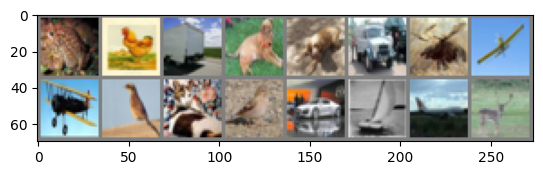

frog  bird  truck dog   dog   truck deer  plane plane bird  cat   bird  car   ship  plane deer 


100%|██████████| 3125/3125 [00:23<00:00, 134.93it/s]


Epoch 1: Train Loss = 1.6278, Test Acc = 0.5383


100%|██████████| 3125/3125 [00:23<00:00, 135.29it/s]


Epoch 2: Train Loss = 1.3121, Test Acc = 0.5933


100%|██████████| 3125/3125 [00:23<00:00, 135.75it/s]


Epoch 3: Train Loss = 1.1535, Test Acc = 0.5742


100%|██████████| 3125/3125 [00:23<00:00, 135.76it/s]


Epoch 4: Train Loss = 1.0326, Test Acc = 0.6858


100%|██████████| 3125/3125 [00:22<00:00, 136.95it/s]


Epoch 5: Train Loss = 0.9414, Test Acc = 0.7030


100%|██████████| 3125/3125 [00:22<00:00, 136.26it/s]


Epoch 6: Train Loss = 0.8534, Test Acc = 0.7346


100%|██████████| 3125/3125 [00:23<00:00, 135.73it/s]


Epoch 7: Train Loss = 0.7802, Test Acc = 0.7601


100%|██████████| 3125/3125 [00:23<00:00, 135.78it/s]


Epoch 8: Train Loss = 0.7208, Test Acc = 0.7320


100%|██████████| 3125/3125 [00:23<00:00, 135.52it/s]


Epoch 9: Train Loss = 0.6738, Test Acc = 0.7784


100%|██████████| 3125/3125 [00:23<00:00, 135.65it/s]


Epoch 10: Train Loss = 0.6168, Test Acc = 0.7862


100%|██████████| 3125/3125 [00:23<00:00, 134.88it/s]


Epoch 11: Train Loss = 0.5826, Test Acc = 0.7943


100%|██████████| 3125/3125 [00:22<00:00, 137.03it/s]


Epoch 12: Train Loss = 0.5421, Test Acc = 0.8101


100%|██████████| 3125/3125 [00:23<00:00, 134.53it/s]


Epoch 13: Train Loss = 0.5034, Test Acc = 0.7888


100%|██████████| 3125/3125 [00:23<00:00, 135.80it/s]


Epoch 14: Train Loss = 0.4693, Test Acc = 0.8043


100%|██████████| 3125/3125 [00:23<00:00, 135.63it/s]


Epoch 15: Train Loss = 0.4426, Test Acc = 0.7813


100%|██████████| 3125/3125 [00:23<00:00, 135.58it/s]


Epoch 16: Train Loss = 0.4107, Test Acc = 0.7907


100%|██████████| 3125/3125 [00:22<00:00, 136.60it/s]


Epoch 17: Train Loss = 0.3865, Test Acc = 0.8219


100%|██████████| 3125/3125 [00:23<00:00, 135.80it/s]


Epoch 18: Train Loss = 0.3610, Test Acc = 0.8274


100%|██████████| 3125/3125 [00:22<00:00, 137.31it/s]


Epoch 19: Train Loss = 0.3403, Test Acc = 0.8213


100%|██████████| 3125/3125 [00:23<00:00, 134.74it/s]


Epoch 20: Train Loss = 0.3182, Test Acc = 0.8255


100%|██████████| 3125/3125 [00:22<00:00, 136.51it/s]


Epoch 21: Train Loss = 0.2975, Test Acc = 0.8264


100%|██████████| 3125/3125 [00:22<00:00, 136.06it/s]


Epoch 22: Train Loss = 0.2717, Test Acc = 0.8220


100%|██████████| 3125/3125 [00:23<00:00, 135.62it/s]


Epoch 23: Train Loss = 0.2560, Test Acc = 0.8279


100%|██████████| 3125/3125 [00:22<00:00, 135.99it/s]


Epoch 24: Train Loss = 0.2392, Test Acc = 0.8135


100%|██████████| 3125/3125 [00:23<00:00, 135.34it/s]


Epoch 25: Train Loss = 0.2211, Test Acc = 0.8199


100%|██████████| 3125/3125 [00:22<00:00, 137.28it/s]


Epoch 26: Train Loss = 0.2096, Test Acc = 0.8035


100%|██████████| 3125/3125 [00:22<00:00, 136.61it/s]


Epoch 27: Train Loss = 0.1927, Test Acc = 0.8184


100%|██████████| 3125/3125 [00:22<00:00, 136.34it/s]


Epoch 28: Train Loss = 0.1813, Test Acc = 0.8117


100%|██████████| 3125/3125 [00:23<00:00, 135.83it/s]


Epoch 29: Train Loss = 0.1730, Test Acc = 0.8202


100%|██████████| 3125/3125 [00:22<00:00, 136.03it/s]


Epoch 30: Train Loss = 0.1591, Test Acc = 0.8276


100%|██████████| 3125/3125 [00:22<00:00, 135.92it/s]


Epoch 31: Train Loss = 0.1513, Test Acc = 0.8178


100%|██████████| 3125/3125 [00:22<00:00, 135.98it/s]


Epoch 32: Train Loss = 0.1455, Test Acc = 0.8240


100%|██████████| 3125/3125 [00:23<00:00, 135.40it/s]


Epoch 33: Train Loss = 0.1349, Test Acc = 0.8120


100%|██████████| 3125/3125 [00:22<00:00, 138.24it/s]


Epoch 34: Train Loss = 0.1330, Test Acc = 0.8282


100%|██████████| 3125/3125 [00:22<00:00, 136.28it/s]


Epoch 35: Train Loss = 0.1182, Test Acc = 0.8209


100%|██████████| 3125/3125 [00:22<00:00, 136.05it/s]


Epoch 36: Train Loss = 0.1112, Test Acc = 0.8191


100%|██████████| 3125/3125 [00:23<00:00, 135.26it/s]


Epoch 37: Train Loss = 0.1125, Test Acc = 0.7946


100%|██████████| 3125/3125 [00:22<00:00, 136.43it/s]


Epoch 38: Train Loss = 0.1042, Test Acc = 0.8321


100%|██████████| 3125/3125 [00:22<00:00, 135.99it/s]


Epoch 39: Train Loss = 0.0941, Test Acc = 0.8316


100%|██████████| 3125/3125 [00:22<00:00, 136.36it/s]


Epoch 40: Train Loss = 0.0920, Test Acc = 0.8278


100%|██████████| 3125/3125 [00:22<00:00, 138.09it/s]


Epoch 41: Train Loss = 0.0851, Test Acc = 0.8265


100%|██████████| 3125/3125 [00:22<00:00, 136.26it/s]


Epoch 42: Train Loss = 0.0808, Test Acc = 0.8351


100%|██████████| 3125/3125 [00:22<00:00, 136.34it/s]


Epoch 43: Train Loss = 0.0807, Test Acc = 0.8216


100%|██████████| 3125/3125 [00:22<00:00, 136.46it/s]


Epoch 44: Train Loss = 0.0733, Test Acc = 0.8065


100%|██████████| 3125/3125 [00:22<00:00, 136.51it/s]


Epoch 45: Train Loss = 0.0728, Test Acc = 0.8292


100%|██████████| 3125/3125 [00:22<00:00, 136.16it/s]


Epoch 46: Train Loss = 0.0703, Test Acc = 0.8236


100%|██████████| 3125/3125 [00:22<00:00, 136.38it/s]


Epoch 47: Train Loss = 0.0656, Test Acc = 0.8304


100%|██████████| 3125/3125 [00:23<00:00, 135.85it/s]


Epoch 48: Train Loss = 0.0649, Test Acc = 0.8254


100%|██████████| 3125/3125 [00:22<00:00, 138.09it/s]


Epoch 49: Train Loss = 0.0650, Test Acc = 0.8232


100%|██████████| 3125/3125 [00:22<00:00, 136.59it/s]


Epoch 50: Train Loss = 0.0615, Test Acc = 0.8251


In [ ]:
# CIFAR-10 CNN 실습 템플릿 (Augmentation 없음)
# Q3.
# learning rate=0.01 -> epoch = 50
# Q2와 같은 코드 (learning rate, epoch 수 제외)
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from tqdm import tqdm

# 1. 데이터셋 준비
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # RGB 채널 정규화
])

train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

train_batch_size = 16
test_batch_size = 16

train_loader = DataLoader(train_set, batch_size=train_batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=test_batch_size, shuffle=False)

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 학습용 이미지를 무작위로 가져오기
dataiter = iter(train_loader)
images, labels = next(dataiter)

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(train_batch_size)))

# 2. CNN 모델 정의
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.features = nn.Sequential(
            # Conv->Pool (3->64)
            nn.Conv2d(3, 64, 3, padding=1),
            nn.BatchNorm2d(64), nn.ReLU(inplace=True),
            nn.MaxPool2d(2),

            # Conv->Pool (64->128)
            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128), nn.ReLU(inplace=True),
            nn.MaxPool2d(2),

            # Conv->Pool (128->256)
            nn.Conv2d(128, 256, 3, padding=1),
            nn.BatchNorm2d(256), nn.ReLU(inplace=True),
            nn.AdaptiveAvgPool2d((1, 1))  # Global Average Pooling → [B, 64, 1, 1]
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),                  # → [B, 64]
            nn.Linear(256,128),
            nn.ReLU(inplace=True),
            # Dropout(0.5) 추가 -> 오버피팅 방지
            nn.Dropout(0.5),
            nn.Linear(128,10)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# 3. 학습 함수
def train(model, loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    for inputs, targets in tqdm(loader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

# 4. 평가 함수
def evaluate(model, loader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == targets).sum().item()
            total += targets.size(0)
    return correct / total

# 5. 학습
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

num_epochs = 50
for epoch in range(num_epochs):
    train_loss = train(model, train_loader, criterion, optimizer, device)
    test_acc = evaluate(model, test_loader, device)
    print(f"Epoch {epoch+1}: Train Loss = {train_loss:.4f}, Test Acc = {test_acc:.4f}")


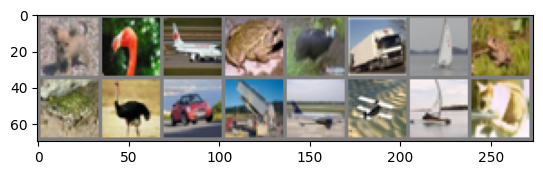

dog   bird  plane frog  bird  truck ship  frog  frog  bird  car   truck plane plane ship  cat  


100%|██████████| 3125/3125 [00:25<00:00, 120.71it/s]


Epoch 1: Train Loss = 2.3151, Test Acc = 0.1000


100%|██████████| 3125/3125 [00:27<00:00, 114.07it/s]


Epoch 2: Train Loss = 2.3171, Test Acc = 0.1000


100%|██████████| 3125/3125 [00:24<00:00, 128.57it/s]


Epoch 3: Train Loss = 2.3175, Test Acc = 0.1000


100%|██████████| 3125/3125 [00:22<00:00, 137.02it/s]


Epoch 4: Train Loss = 2.3166, Test Acc = 0.1000


100%|██████████| 3125/3125 [00:22<00:00, 137.00it/s]


Epoch 5: Train Loss = 2.3165, Test Acc = 0.1000


100%|██████████| 3125/3125 [00:22<00:00, 136.72it/s]


Epoch 6: Train Loss = 2.3168, Test Acc = 0.1000


100%|██████████| 3125/3125 [00:23<00:00, 133.06it/s]


Epoch 7: Train Loss = 2.3168, Test Acc = 0.1000


100%|██████████| 3125/3125 [00:24<00:00, 126.37it/s]


Epoch 8: Train Loss = 2.3169, Test Acc = 0.1000


100%|██████████| 3125/3125 [00:22<00:00, 136.75it/s]


Epoch 9: Train Loss = 2.3174, Test Acc = 0.1000


100%|██████████| 3125/3125 [00:22<00:00, 137.76it/s]


Epoch 10: Train Loss = 2.3164, Test Acc = 0.1000


100%|██████████| 3125/3125 [00:22<00:00, 138.00it/s]


Epoch 11: Train Loss = 2.3160, Test Acc = 0.1000


100%|██████████| 3125/3125 [00:23<00:00, 133.95it/s]


Epoch 12: Train Loss = 2.3172, Test Acc = 0.1000


100%|██████████| 3125/3125 [00:22<00:00, 136.88it/s]


Epoch 13: Train Loss = 2.3159, Test Acc = 0.1000


100%|██████████| 3125/3125 [00:22<00:00, 136.36it/s]


Epoch 14: Train Loss = 2.3172, Test Acc = 0.1000


100%|██████████| 3125/3125 [00:22<00:00, 137.00it/s]


Epoch 15: Train Loss = 2.3171, Test Acc = 0.1000


100%|██████████| 3125/3125 [00:22<00:00, 137.19it/s]


Epoch 16: Train Loss = 2.3174, Test Acc = 0.1000


100%|██████████| 3125/3125 [00:23<00:00, 131.99it/s]


Epoch 17: Train Loss = 2.3169, Test Acc = 0.1000


100%|██████████| 3125/3125 [00:26<00:00, 118.80it/s]


Epoch 18: Train Loss = 2.3174, Test Acc = 0.1000


100%|██████████| 3125/3125 [00:26<00:00, 115.90it/s]


Epoch 19: Train Loss = 2.3168, Test Acc = 0.1000


100%|██████████| 3125/3125 [00:26<00:00, 117.93it/s]


Epoch 20: Train Loss = 2.3166, Test Acc = 0.1000


In [ ]:
# CIFAR-10 CNN 실습 템플릿 (Augmentation 없음)
# Q3.
# learning rate=0.1 -> epoch=20
# Q2와 같은 코드 (learning rate, epoch 수 제외)
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from tqdm import tqdm

# 1. 데이터셋 준비
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # RGB 채널 정규화
])

train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

train_batch_size = 16
test_batch_size = 16

train_loader = DataLoader(train_set, batch_size=train_batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=test_batch_size, shuffle=False)

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 학습용 이미지를 무작위로 가져오기
dataiter = iter(train_loader)
images, labels = next(dataiter)

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(train_batch_size)))

# 2. CNN 모델 정의
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.features = nn.Sequential(
            # Conv->Pool (3->64)
            nn.Conv2d(3, 64, 3, padding=1),
            nn.BatchNorm2d(64), nn.ReLU(inplace=True),
            nn.MaxPool2d(2),

            # Conv->Pool (64->128)
            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128), nn.ReLU(inplace=True),
            nn.MaxPool2d(2),

            # Conv->Pool (128->256)
            nn.Conv2d(128, 256, 3, padding=1),
            nn.BatchNorm2d(256), nn.ReLU(inplace=True),
            nn.AdaptiveAvgPool2d((1, 1))  # Global Average Pooling → [B, 64, 1, 1]
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),                  # → [B, 64]
            nn.Linear(256,128),
            nn.ReLU(inplace=True),
            # Dropout(0.5) 추가 -> 오버피팅 방지
            nn.Dropout(0.5),
            nn.Linear(128,10)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# 3. 학습 함수
def train(model, loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    for inputs, targets in tqdm(loader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

# 4. 평가 함수
def evaluate(model, loader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == targets).sum().item()
            total += targets.size(0)
    return correct / total

# 5. 학습
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

num_epochs = 20
for epoch in range(num_epochs):
    train_loss = train(model, train_loader, criterion, optimizer, device)
    test_acc = evaluate(model, test_loader, device)
    print(f"Epoch {epoch+1}: Train Loss = {train_loss:.4f}, Test Acc = {test_acc:.4f}")


Q3.
- lr=0.001
- learning rate가 너무 작아서 loss function을 미세하게 탐색하여 안정적으로 수렴하게 된다.
- 하지만 수렴 속도가 엄청 느리고, epoch을 작게 하면 충분한 학습이 안 되기 때문에 100이상을 권장한다고 한다.
- 따라서 시간이 매우 오래 걸린다는 단점이 있으나 높은 학습률을 볼 수 있다.
- 결과 => Epoch 100: Train Loss = 0.0501, Test Acc = 0.8366

---
- lr=0.01
- learning rate가 0.001일 때보다 비교적 빠른 수렴 속도를 보인다.
- 따라서 학습 속도도 적절하다.
- 안정적인 loss 감소 덕분에 정확한 학습이 된다.
- 결과 => Epoch 50: Train Loss = 0.0615, Test Acc = 0.8251

---
- lr=0.1
- learning rate가 너무 커서 정확도가 10%밖에 나오지 않는다.
- -> 처음에는 loss가 빠르게 떨어지는 듯 보이다가 최적점 주변에서 오버슈트가 발생하여 손실이 다시 커지기 때문이다.
- => 따라서 이 모델은 올바른 fearure points를 학습하지 못하고 무작위 출력만 하게 되어 클래스 10개 중 1개를 고르는 무작위 예측 확률 10%가 나오게 된다.
- 이를 발산(divergence)이라고 한다.
- * 이를 방지하기 위해서는 스케줄러를 사용하여 큰 LR로 빠르게 학습하고 후반부에 LR을 점진적으로 줄여 안정된 수렴을 유도해야 한다.


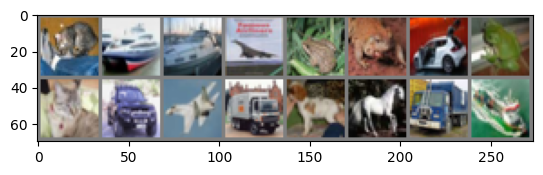

GroundTruth:  cat   ship  ship  plane frog  frog  car   frog  cat   car   plane truck dog   horse truck ship 
Predicted:  cat   car   ship  ship 


In [ ]:
# Q2.
dataiter = iter(test_loader)
images, labels = next(dataiter)

# 이미지를 출력합니다.
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(test_batch_size)))

images = images.to(device)
outputs = model(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))


In [ ]:
# Q2.
correct = 0
total = 0
# 학습 중이 아니므로, 출력에 대한 미분 계산 필요없ㅇ ㅁ
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images = images.to(device)
        # 신경망에 이미지를 통과시켜 출력을 계산
        outputs = model(images)
        # 가장 높은 값을 갖는 분류(class)를 정답으로 선택
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted.cpu() == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

# 각 분류(class)에 대한 예측값 계산을 위해 준비
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images = images.to(device)
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        # 각 분류별로 올바른 예측 수를 모음
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# 각 분류별 정확도(accuracy)를 출력
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')



Accuracy of the network on the 10000 test images: 69 %
Accuracy for class: plane is 61.0 %
Accuracy for class: car   is 92.1 %
Accuracy for class: bird  is 51.6 %
Accuracy for class: cat   is 52.7 %
Accuracy for class: deer  is 54.3 %
Accuracy for class: dog   is 70.2 %
Accuracy for class: frog  is 84.2 %
Accuracy for class: horse is 63.6 %
Accuracy for class: ship  is 87.6 %
Accuracy for class: truck is 80.0 %


Q4. 분석
- 과적합 감소
-> 원본 모델에서는 동일한 50000장 CIFAR-10 이미지를 반복 학습하여 오버피팅 문제가 발생할 수 있음.
-> Augmentation을 통해 무작위로 변형된 수십만장의 데이터로 학습함으로써, 모델이 더욱 일반적인 특징을 학습하도록 유도할 수 있음.

- 일반화 성능 향상
-> 다양한 변형(플립, 색상 변화, 회전) 덕분에 테스트 정확도가 조금 더 높아짐.

- 학습 안정성
-> Augmentation된 데이터는 개별 이미지마다 분산된 특성을 갖기 때문에, 배치 단위 손실 차이가 줄어듦.
-> 이 덕분에 loss function이 더 매끄럽게 변하고, 배치 간 편차가 감소함.

- 결과: Epoch 50: Train Loss = 0.5816, Test Acc = 0.8140

https://docs.pytorch.org/vision/0.9/transforms.html 주요 기능
- 1. 기본 변환 (PIL <-> Tensor)
-> ToTensor: PIL 이미지 or NumPy 배열을 (C, H, W) 형태의 FloatTensor로 변환 (0-255 -> 0-1)
- 2. 리사이즈 & 크롭
-> 입력 이미지를 지정 크기로 조정
-> 중앙 기준으로 크롭
-> 무작위 크롭
-> 크기, 종횡비 랜덤 샘플링하고 크롭 후 리사이즈
- 3. 색상 변화
-> ColorJitter: 발기, 대비, 채도, 색상 랜덤 변화
-4. 기하 변환
-> 좌우/상하 반전
-> 회전
-> 원근 왜곡

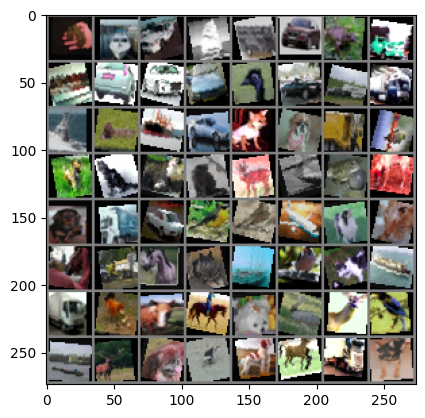

frog  ship  car   ship  truck car   frog  truck ship  car   car   car   bird  car   truck truck


100%|██████████| 782/782 [00:40<00:00, 19.35it/s]


Epoch 1: Train Loss = 1.7880, Test Acc = 0.4067


100%|██████████| 782/782 [00:40<00:00, 19.14it/s]


Epoch 2: Train Loss = 1.5255, Test Acc = 0.4755


100%|██████████| 782/782 [00:40<00:00, 19.27it/s]


Epoch 3: Train Loss = 1.4084, Test Acc = 0.5297


100%|██████████| 782/782 [00:40<00:00, 19.24it/s]


Epoch 4: Train Loss = 1.3230, Test Acc = 0.5732


100%|██████████| 782/782 [00:41<00:00, 18.85it/s]


Epoch 5: Train Loss = 1.2618, Test Acc = 0.6044


100%|██████████| 782/782 [00:40<00:00, 19.27it/s]


Epoch 6: Train Loss = 1.2194, Test Acc = 0.5933


100%|██████████| 782/782 [00:40<00:00, 19.33it/s]


Epoch 7: Train Loss = 1.1784, Test Acc = 0.5954


100%|██████████| 782/782 [00:41<00:00, 18.73it/s]


Epoch 8: Train Loss = 1.1322, Test Acc = 0.6123


100%|██████████| 782/782 [00:40<00:00, 19.18it/s]


Epoch 9: Train Loss = 1.1033, Test Acc = 0.6202


100%|██████████| 782/782 [00:40<00:00, 19.20it/s]


Epoch 10: Train Loss = 1.0699, Test Acc = 0.6644


100%|██████████| 782/782 [00:40<00:00, 19.23it/s]


Epoch 11: Train Loss = 1.0410, Test Acc = 0.6473


100%|██████████| 782/782 [00:40<00:00, 19.20it/s]


Epoch 12: Train Loss = 1.0150, Test Acc = 0.6438


100%|██████████| 782/782 [00:40<00:00, 19.18it/s]


Epoch 13: Train Loss = 0.9917, Test Acc = 0.6750


100%|██████████| 782/782 [00:40<00:00, 19.17it/s]


Epoch 14: Train Loss = 0.9665, Test Acc = 0.7068


100%|██████████| 782/782 [00:41<00:00, 19.00it/s]


Epoch 15: Train Loss = 0.9409, Test Acc = 0.6820


100%|██████████| 782/782 [00:40<00:00, 19.14it/s]


Epoch 16: Train Loss = 0.9187, Test Acc = 0.6987


100%|██████████| 782/782 [00:40<00:00, 19.14it/s]


Epoch 17: Train Loss = 0.8995, Test Acc = 0.7234


100%|██████████| 782/782 [00:41<00:00, 19.03it/s]


Epoch 18: Train Loss = 0.8808, Test Acc = 0.7334


100%|██████████| 782/782 [00:40<00:00, 19.12it/s]


Epoch 19: Train Loss = 0.8649, Test Acc = 0.7298


100%|██████████| 782/782 [00:40<00:00, 19.12it/s]


Epoch 20: Train Loss = 0.8453, Test Acc = 0.7244


100%|██████████| 782/782 [00:41<00:00, 18.95it/s]


Epoch 21: Train Loss = 0.8339, Test Acc = 0.7245


100%|██████████| 782/782 [00:40<00:00, 19.24it/s]


Epoch 22: Train Loss = 0.8145, Test Acc = 0.7579


100%|██████████| 782/782 [00:40<00:00, 19.10it/s]


Epoch 23: Train Loss = 0.7994, Test Acc = 0.7655


100%|██████████| 782/782 [00:41<00:00, 18.78it/s]


Epoch 24: Train Loss = 0.7873, Test Acc = 0.7629


100%|██████████| 782/782 [00:40<00:00, 19.17it/s]


Epoch 25: Train Loss = 0.7791, Test Acc = 0.7659


100%|██████████| 782/782 [00:40<00:00, 19.29it/s]


Epoch 26: Train Loss = 0.7706, Test Acc = 0.7665


100%|██████████| 782/782 [00:41<00:00, 18.68it/s]


Epoch 27: Train Loss = 0.7537, Test Acc = 0.7881


100%|██████████| 782/782 [00:40<00:00, 19.27it/s]


Epoch 28: Train Loss = 0.7412, Test Acc = 0.7526


100%|██████████| 782/782 [00:40<00:00, 19.24it/s]


Epoch 29: Train Loss = 0.7375, Test Acc = 0.7740


100%|██████████| 782/782 [00:41<00:00, 19.01it/s]


Epoch 30: Train Loss = 0.7176, Test Acc = 0.7856


100%|██████████| 782/782 [00:40<00:00, 19.21it/s]


Epoch 31: Train Loss = 0.7112, Test Acc = 0.7960


100%|██████████| 782/782 [00:41<00:00, 18.97it/s]


Epoch 32: Train Loss = 0.7022, Test Acc = 0.7995


100%|██████████| 782/782 [00:42<00:00, 18.46it/s]


Epoch 33: Train Loss = 0.6959, Test Acc = 0.7929


100%|██████████| 782/782 [00:41<00:00, 18.94it/s]


Epoch 34: Train Loss = 0.6853, Test Acc = 0.7998


100%|██████████| 782/782 [00:41<00:00, 18.94it/s]


Epoch 35: Train Loss = 0.6717, Test Acc = 0.8057


100%|██████████| 782/782 [00:42<00:00, 18.51it/s]


Epoch 36: Train Loss = 0.6666, Test Acc = 0.8052


100%|██████████| 782/782 [00:41<00:00, 18.98it/s]


Epoch 37: Train Loss = 0.6602, Test Acc = 0.7927


100%|██████████| 782/782 [00:41<00:00, 18.83it/s]


Epoch 38: Train Loss = 0.6496, Test Acc = 0.8159


100%|██████████| 782/782 [00:41<00:00, 18.77it/s]


Epoch 39: Train Loss = 0.6481, Test Acc = 0.8073


100%|██████████| 782/782 [00:40<00:00, 19.28it/s]


Epoch 40: Train Loss = 0.6424, Test Acc = 0.8064


100%|██████████| 782/782 [00:40<00:00, 19.21it/s]


Epoch 41: Train Loss = 0.6343, Test Acc = 0.8146


100%|██████████| 782/782 [00:40<00:00, 19.26it/s]


Epoch 42: Train Loss = 0.6303, Test Acc = 0.8209


100%|██████████| 782/782 [00:40<00:00, 19.32it/s]


Epoch 43: Train Loss = 0.6224, Test Acc = 0.8158


100%|██████████| 782/782 [00:40<00:00, 19.23it/s]


Epoch 44: Train Loss = 0.6178, Test Acc = 0.8131


100%|██████████| 782/782 [00:41<00:00, 18.95it/s]


Epoch 45: Train Loss = 0.6115, Test Acc = 0.8223


100%|██████████| 782/782 [00:41<00:00, 19.07it/s]


Epoch 46: Train Loss = 0.6084, Test Acc = 0.8206


100%|██████████| 782/782 [00:40<00:00, 19.11it/s]


Epoch 47: Train Loss = 0.5951, Test Acc = 0.8082


100%|██████████| 782/782 [00:41<00:00, 18.94it/s]


Epoch 48: Train Loss = 0.5934, Test Acc = 0.8159


100%|██████████| 782/782 [00:40<00:00, 19.20it/s]


Epoch 49: Train Loss = 0.5891, Test Acc = 0.8127


100%|██████████| 782/782 [00:40<00:00, 19.17it/s]


Epoch 50: Train Loss = 0.5816, Test Acc = 0.8140


In [ ]:
# Q4.
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torchvision
# Q3의 learning rate=0.01, epochs=50 코드 (정확도와 학습 속도가 가장 좋은 모델)
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from tqdm import tqdm

# 1. 데이터셋 준비 (Augmentation 적용)
# (1) 테스트 세트용 Transform (Augmentation 없이 평소대로)
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
])

# (2) 학습 세트용 Transform (여기에만 Augmentation 추가)
train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),              # 1) RandomCrop + padding
    transforms.RandomHorizontalFlip(p=0.5),            # 2) RandomHorizontalFlip
    transforms.ColorJitter(brightness=0.2,             # 3) ColorJitter
                           contrast=0.2,
                           saturation=0.2,
                           hue=0.1),
    transforms.RandomRotation(degrees=15),             # 4) RandomRotation
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
])

# 데이터셋·로더 생성
train_set = torchvision.datasets.CIFAR10(root='./data',
                                         train=True,
                                         download=True,
                                         transform=train_transform)
test_set  = torchvision.datasets.CIFAR10(root='./data',
                                         train=False,
                                         download=True,
                                         transform=test_transform)

train_loader = DataLoader(train_set, batch_size=64, shuffle=True,  num_workers=4)
test_loader  = DataLoader(test_set,  batch_size=256, shuffle=False, num_workers=4)

# 학습용 이미지를 무작위로 가져오기
dataiter = iter(train_loader)
images, labels = next(dataiter)

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(train_batch_size)))

# 2. CNN 모델 정의
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.features = nn.Sequential(
            # Conv->Pool (3->64)
            nn.Conv2d(3, 64, 3, padding=1),
            nn.BatchNorm2d(64), nn.ReLU(inplace=True),
            nn.MaxPool2d(2),

            # Conv->Pool (64->128)
            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128), nn.ReLU(inplace=True),
            nn.MaxPool2d(2),

            # Conv->Pool (128->256)
            nn.Conv2d(128, 256, 3, padding=1),
            nn.BatchNorm2d(256), nn.ReLU(inplace=True),
            nn.AdaptiveAvgPool2d((1, 1))  # Global Average Pooling → [B, 64, 1, 1]
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),                  # → [B, 64]
            nn.Linear(256,128),
            nn.ReLU(inplace=True),
            # Dropout(0.5) 추가 -> 오버피팅 방지
            nn.Dropout(0.5),
            nn.Linear(128,10)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# 3. 학습 함수
def train(model, loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    for inputs, targets in tqdm(loader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

# 4. 평가 함수
def evaluate(model, loader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == targets).sum().item()
            total += targets.size(0)
    return correct / total

# 5. 학습
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

num_epochs = 50
for epoch in range(num_epochs):
    train_loss = train(model, train_loader, criterion, optimizer, device)
    test_acc = evaluate(model, test_loader, device)
    print(f"Epoch {epoch+1}: Train Loss = {train_loss:.4f}, Test Acc = {test_acc:.4f}")

